In [ ]:
# U.S. Medical Insurance Costs

In [43]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


In [7]:
data = pd.read_csv('insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The average age of the patients is: 39.21
39.0
18 64


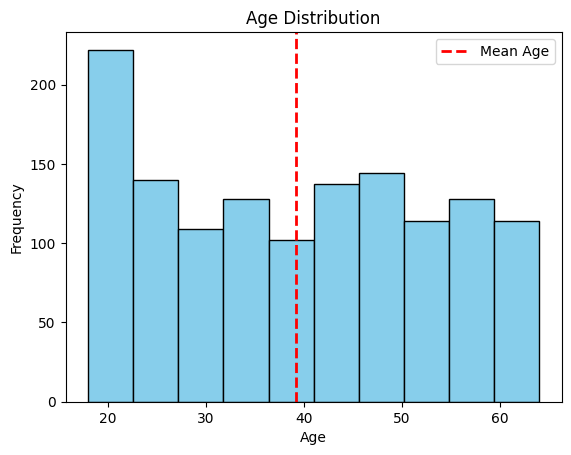

In [30]:
#Average Age of patients in the dataset
avg_age = data.age.mean()
print('The average age of the patients is: {}'.format(round(avg_age, 2)))
#Median Age
med_age = data.age.median()
print(med_age)

#Youngest and Oldest Patients
max_age = data.age.max()
min_age = data.age.min()
print(min_age, max_age)

# mean == median, suggesting the data is likely symmetric and the mean is reliable.
# However, the min/max values are far from the mean, which suggests unreliability. 

plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(data['age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#We have an outlier of 20. The data might represent a population where most people are young, but there is a significant group of older individuals.

In [35]:
#Exploring Region
unique_regions, region_counts = np.unique(data['region'], return_counts = True)
print(unique_regions, region_counts)
std_value = region_counts.std()
print(f"Standard Deviation: {std_value}")
#There are 4 distinct regions, the majority of the patients are from the southeast.
#A standard deviation of 17 suggests that while the regions are fairly evenly represented, some regions still have a noticeable difference in their count of data points.

['northeast' 'northwest' 'southeast' 'southwest'] [324 325 364 325]
Standard Deviation: 17.03672503740082


region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


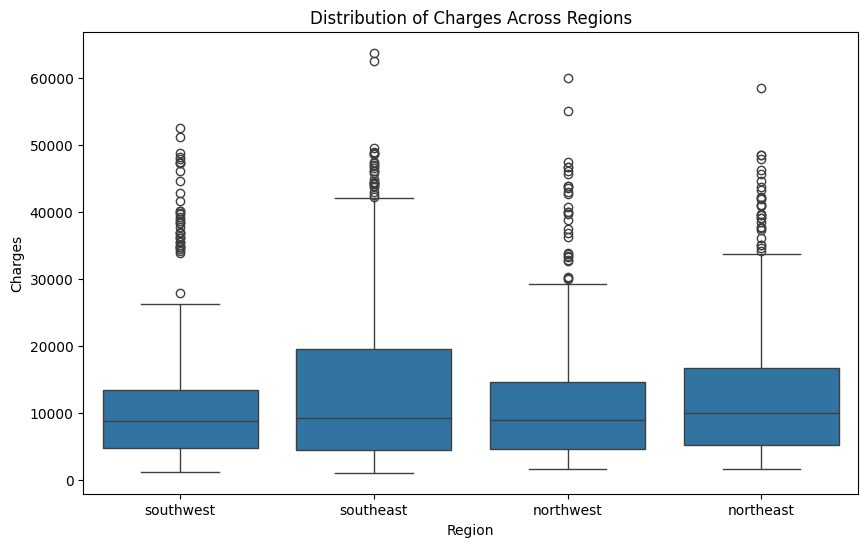

F-statistic: 2.96962669358912, p-value: 0.0308933560705201


In [42]:
#Relationship between Region and Charges
region_charges_mean = data.groupby('region')['charges'].mean()
print(region_charges_mean)

plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Distribution of Charges Across Regions')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

from scipy.stats import f_oneway
groups = [data['charges'][data['region'] == region] for region in data['region'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

#The F-statistic of 2.97 and the p-value of 0.03 indicate that there is a statistically significant difference in charges between the four regions (Northeast, Northwest, Southeast, and Southwest). The p-value being below the common significance threshold of 0.05 suggests that regional differences in charges are unlikely to be due to random variation.
#Region appears to have a significant impact on the variation of charges, with the Southeast showing higher values, and the Northwest and Southwest showing lower ones.